# Practice Artificial neural network using Keras

---

## Data load
Titanic

In [4]:
import pandas as pd

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv')
df.head()

## Encoding
sex(One-Hot-Encoding), pclass(Label Encoding)

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
ohe = OneHotEncoder()
lb = LabelBinarizer()

In [6]:
lb.fit(df.loc[:, "sex"])
df["sex"] = lb.fit_transform(df["sex"])

In [8]:
import numpy as np
dfX_1 = pd.DataFrame(OneHotEncoder().fit_transform(np.array(df["pclass"])[:,np.newaxis]).toarray(), columns=["A_Class", "B_Class", "C_Class"])

In [9]:
df.loc[:, "age"].fillna(int(df["age"].mean()), inplace=True)

In [10]:
feature_name = ["sex", "age", "fare"]
dfX = df[feature_name]
dfY = df["survived"]

In [11]:
dfX = pd.concat([dfX, dfX_1], axis=1)

## Split data(train, test)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.25, random_state=1)

In [13]:
X_train, X_test, y_train, y_test

(     sex    age      fare  A_Class  B_Class  C_Class
 35     1  42.00   52.0000      1.0      0.0      0.0
 46     1  29.00   15.5000      0.0      0.0      1.0
 453    1  49.00   89.1042      1.0      0.0      0.0
 291    0  19.00   91.0792      1.0      0.0      0.0
 748    1  19.00   53.1000      1.0      0.0      0.0
 41     0  27.00   21.0000      0.0      1.0      0.0
 224    1  38.00   90.0000      1.0      0.0      0.0
 340    1   2.00   26.0000      0.0      1.0      0.0
 125    1  12.00   11.2417      0.0      0.0      1.0
 803    1   0.42    8.5167      0.0      0.0      1.0
 800    1  34.00   13.0000      0.0      1.0      0.0
 108    1  38.00    7.8958      0.0      0.0      1.0
 578    0  29.00   14.4583      0.0      0.0      1.0
 888    0  29.00   23.4500      0.0      0.0      1.0
 593    0  29.00    7.7500      0.0      0.0      1.0
 550    1  17.00  110.8833      1.0      0.0      0.0
 0      1  22.00    7.2500      0.0      0.0      1.0
 684    1  60.00   39.0000  

## Set Artifial neural network
2 layers

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import *

Using TensorFlow backend.


In [69]:
model = Sequential()

In [70]:
model.add(Dense(100, input_dim=6, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.add(Dense(100, activation="relu", kernel_initializer="glorot_uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.compile(optimizer=RMSprop(), loss='mse', metrics=["accuracy"])

In [71]:
model.layers

In [72]:
X_train.values

array([[  1.    ,  42.    ,  52.    ,   1.    ,   0.    ,   0.    ],
       [  1.    ,  29.    ,  15.5   ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  49.    ,  89.1042,   1.    ,   0.    ,   0.    ],
       ..., 
       [  1.    ,  21.    ,  73.5   ,   0.    ,   1.    ,   0.    ],
       [  0.    ,  29.    ,   7.55  ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  21.    ,   8.05  ,   0.    ,   0.    ,   1.    ]])

In [73]:
model_result = model.fit(X_train.values, y_train.values, epochs=100, batch_size=100, 
                         validation_data=(X_test.values, y_test.values), verbose=2)

Train on 668 samples, validate on 223 samples
Epoch 1/100
0s - loss: 0.2216 - acc: 0.6317 - val_loss: 0.2318 - val_acc: 0.6143
Epoch 2/100
0s - loss: 0.1994 - acc: 0.7021 - val_loss: 0.2257 - val_acc: 0.6323
Epoch 3/100
0s - loss: 0.1986 - acc: 0.7036 - val_loss: 0.2278 - val_acc: 0.6323
Epoch 4/100
0s - loss: 0.1971 - acc: 0.7066 - val_loss: 0.2437 - val_acc: 0.6143
Epoch 5/100
0s - loss: 0.2011 - acc: 0.7066 - val_loss: 0.2413 - val_acc: 0.6278
Epoch 6/100
0s - loss: 0.1953 - acc: 0.7126 - val_loss: 0.2367 - val_acc: 0.6143
Epoch 7/100
0s - loss: 0.1970 - acc: 0.7051 - val_loss: 0.2332 - val_acc: 0.6278
Epoch 8/100
0s - loss: 0.1938 - acc: 0.7126 - val_loss: 0.2211 - val_acc: 0.6413
Epoch 9/100
0s - loss: 0.1969 - acc: 0.7156 - val_loss: 0.2330 - val_acc: 0.6278
Epoch 10/100
0s - loss: 0.1925 - acc: 0.7126 - val_loss: 0.2265 - val_acc: 0.6278
Epoch 11/100
0s - loss: 0.1911 - acc: 0.7081 - val_loss: 0.2219 - val_acc: 0.6457
Epoch 12/100
0s - loss: 0.1927 - acc: 0.7156 - val_loss: 0.23

## Result

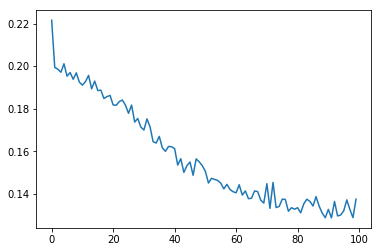

In [74]:
import matplotlib.pyplot as plt
plt.plot(model_result.history["loss"])
plt.show()

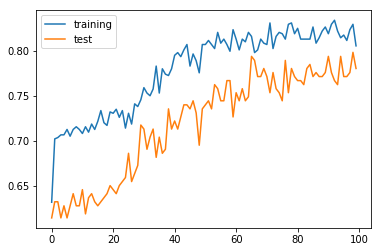

In [75]:
plt.plot(model_result.history["acc"], label="training")
plt.plot(model_result.history["val_acc"], label="test")
plt.legend()
plt.show()

In [76]:
y_predict = model.predict_classes(X_test.values)

 32/223 [===>..........................] - ETA: 0s

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       128
          1       0.74      0.74      0.74        95

avg / total       0.78      0.78      0.78       223

